# Extra Credit Class Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

## **Question 1** (Preprocessing)

#### **1a**: Loading the Data

In [2]:
df = pd.read_csv('../../Data/main/titanic/train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### **1b**: Seperating the dependent variable (y)

In [3]:
df = df[df['Embarked'].notna()]
y = df['Embarked']
y[:5]

PassengerId
1    S
2    C
3    S
4    S
5    S
Name: Embarked, dtype: object

#### **1c**: Isolating the independent variables (X)

In [4]:
X = df.drop(['Embarked', 'Ticket', 'Cabin', 'Name'], axis=1)
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


#### **1d**: Converting `sex` to a numerical variable

In [5]:
X['Sex'] = X['Sex'].map({'male': 1, 'female': 0})
X.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500


#### **1e**: Before splitting the data, we need to impute the missing values

In [6]:
X.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [7]:
X = X.fillna(X.mean())
X.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

## **Question 2** (Classification)

#### **2a**: Splitting the data into training and testing sets (70/30)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=250)
X_train.shape, X_test.shape

((622, 7), (267, 7))

#### **2b**: Training Random Forest Classifier

In [9]:
rfc = RandomForestClassifier(n_estimators=100, random_state=250)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

#### **2c**: Scoring the model

In [10]:
s = accuracy_score(y_test, y_pred)
print(f'Accuracy: {s * 100:.2f}%')

Accuracy: 80.15%


#### **2d**: Evaluating the model

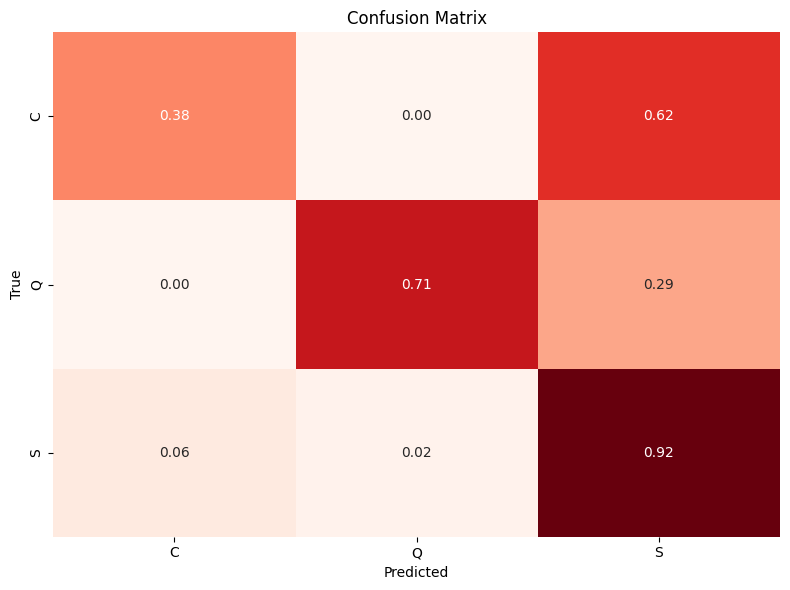

In [11]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
labels = ['C', 'Q', 'S']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='.2f', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

Uhmm not very good :(

In [15]:
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

           C       0.61      0.38      0.47        50
           Q       0.85      0.71      0.77        24
           S       0.82      0.92      0.87       193

    accuracy                           0.80       267
   macro avg       0.76      0.67      0.70       267
weighted avg       0.79      0.80      0.79       267



Here is more proof of why the model is not good!